In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 

In [2]:
DEMO = pd.read_csv('LPOINT_BIG_COMP_01_DEMO.csv',encoding='cp949') # 고객정보
PDDE = pd.read_csv('LPOINT_BIG_COMP_02_PDDE.csv', parse_dates = [6],encoding='cp949') # 구매정보
CLAC = pd.read_csv('LPOINT_BIG_COMP_04_PD_CLAC.csv',encoding='cp949') # 상품 정보

C:\Users\darle\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
DF = pd.merge(PDDE, DEMO, on='cust')
DF = pd.merge(DF, CLAC, on='pd_c')
DF = DF.loc[(DF['ages'] == '20대')&(DF['cop_c'].apply(lambda x: x in ['A02', 'A03', 'A04']))]
print(DF.shape)
DF.head()

(196262, 16)


,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
654,M496844384,A02191496496,1,A02,A020053,PD0290,2021-05-08,17,39000.0,1,여성,20대,Z17,남성티셔츠,남성의류,남성의류상의
2574,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,20000.0,2,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
2575,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,9000.0,9,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
2576,M748140584,A02262444001,1,A02,A020080,PD0290,2021-01-08,17,900.0,9,남성,20대,Z11,남성티셔츠,남성의류,남성의류상의
3166,M395590139,A02064243742,1,A02,A020012,PD0290,2021-02-01,11,600.0,6,여성,20대,Z17,남성티셔츠,남성의류,남성의류상의


In [4]:
factor1 = ['채소', '조미료', '축산물', '과일', '수산물', '건해산물', '양곡', '병통조림', '유제품']
factor2 = ['음료', '과자', '조리식품', '대용식', '냉동식품', '냉장식품', '주류']

fa1df = DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in factor1)]
fa2df = DF.loc[DF['clac_hlv_nm'].apply(lambda x: x in factor2)]
fa2df.head()

,cust,rct_no,chnl_dv,cop_c,br_c,pd_c,de_dt,de_hr,buy_am,buy_ct,ma_fem_dv,ages,zon_hlv,pd_nm,clac_hlv_nm,clac_mcls_nm
35376,M686795542,A02311400378,1,A02,A020097,PD0239,2021-02-15,17,1980.0,1,여성,20대,Z16,쉘초콜릿,과자,초콜릿
35382,M009032626,A02311603194,1,A02,A020097,PD0239,2021-03-22,15,1480.0,1,남성,20대,Z16,쉘초콜릿,과자,초콜릿
35398,M268811651,A04007138336,1,A04,A042952,PD0239,2021-01-30,13,1200.0,1,여성,20대,Z04,쉘초콜릿,과자,초콜릿
35413,M988646555,A02233500236,1,A02,A020068,PD0239,2021-06-20,14,4780.0,1,여성,20대,Z09,쉘초콜릿,과자,초콜릿
35414,M988646555,A04042704742,1,A04,A042362,PD0239,2021-05-27,16,1500.0,1,여성,20대,Z09,쉘초콜릿,과자,초콜릿


In [5]:
Factor1 = fa1df.groupby('cust')['rct_no'].unique().apply(lambda x: len(x)).to_frame('fa1_rct_n')
Factor2 = fa2df.groupby('cust')['rct_no'].unique().apply(lambda x: len(x)).to_frame('fa2_rct_n')

In [6]:
FAdf = pd.merge(Factor1, Factor2, left_index = True, right_index = True)
print(FAdf.shape)
FAdf.head()
#상품 구매데이터 고객기준으로 합쳐서/ scatter plot을 그려보거나, 구매 데이터에 합쳐서 성별 분포 확인, 시간대 확인 

(1836, 2)


,fa1_rct_n,fa2_rct_n
cust,,
M000871427,6,9
M001403108,12,12
M002122238,5,22
M002238144,53,99
M002352655,17,14


# 상품 종류별 성별 구매량 비교

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'

In [8]:
fact_1 = fa1df.groupby(["clac_hlv_nm","ma_fem_dv"])['buy_ct'].sum()
fact1_df = pd.DataFrame(fact_1, columns=['buy_ct'])

fact1_df.reset_index(inplace=True)
fact1_df.head()

,clac_hlv_nm,ma_fem_dv,buy_ct
0,건해산물,남성,558
1,건해산물,여성,1361
2,과일,남성,2618
3,과일,여성,7101
4,병통조림,남성,460


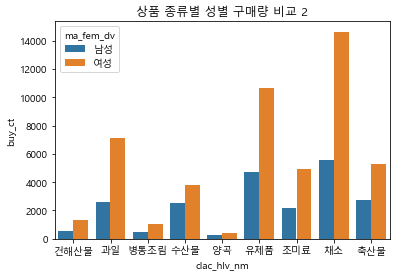

In [9]:
sns.barplot(x="clac_hlv_nm",y="buy_ct",hue="ma_fem_dv",data=fact1_df)
plt.title("상품 종류별 성별 구매량 비교 2")
plt.show()

In [10]:
fact_2 = fa2df.groupby(["clac_hlv_nm","ma_fem_dv"])['buy_ct'].sum()
fact2_df = pd.DataFrame(fact_2, columns=['buy_ct'])

fact2_df.reset_index(inplace=True)
fact2_df.head()

,clac_hlv_nm,ma_fem_dv,buy_ct
0,과자,남성,7671
1,과자,여성,18610
2,냉동식품,남성,2869
3,냉동식품,여성,5875
4,냉장식품,남성,4697


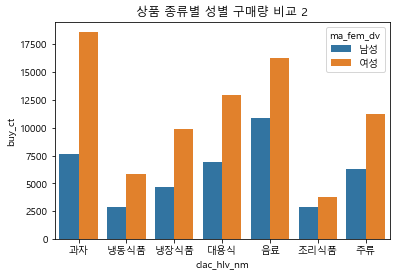

In [11]:
sns.barplot(x="clac_hlv_nm",y="buy_ct",hue="ma_fem_dv",data=fact2_df)
plt.title("상품 종류별 성별 구매량 비교 2")
plt.show()

# 시간대별/상품별 구매량 1

In [16]:
times_1 = fa1df.groupby(["de_hr","clac_hlv_nm"])['cust'].count()
times_1_df = pd.DataFrame(times_1, columns=['cust'])

times_1_df.reset_index(inplace=True)
times_1_df.head()

,de_hr,clac_hlv_nm,cust
0,0,건해산물,4
1,0,과일,19
2,0,병통조림,4
3,0,수산물,8
4,0,유제품,104


In [17]:
times_1_df["clac_hlv_nm"].dropna()
times_1_df['clac_hlv_nm'].unique()

array(['건해산물', '과일', '병통조림', '수산물', '유제품', '조미료', '채소', '축산물', '양곡'],
      dtype=object)

<AxesSubplot:xlabel='de_hr', ylabel='cust'>

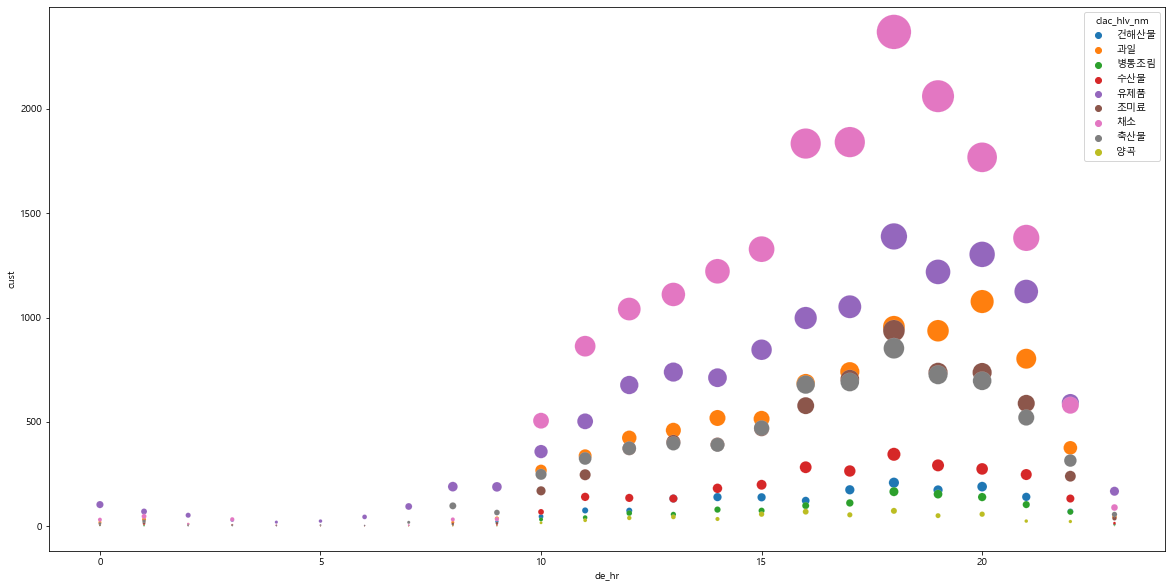

In [18]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=times_1_df['de_hr'],y=times_1_df['cust'],hue=times_1_df['clac_hlv_nm'],s=times_1_df['cust']/2)

# 시간대별/상품별 구매량 2

In [19]:
times_2 = fa2df.groupby(["de_hr","clac_hlv_nm"])['cust'].count()
times_2_df = pd.DataFrame(times_2, columns=['cust'])

times_2_df.reset_index(inplace=True)
times_2_df.head()

,de_hr,clac_hlv_nm,cust
0,0,과자,250
1,0,냉동식품,108
2,0,냉장식품,90
3,0,대용식,136
4,0,음료,343


In [20]:
times_2_df["clac_hlv_nm"].dropna()
times_2_df['clac_hlv_nm'].unique()

array(['과자', '냉동식품', '냉장식품', '대용식', '음료', '조리식품', '주류'], dtype=object)

<AxesSubplot:xlabel='de_hr', ylabel='cust'>

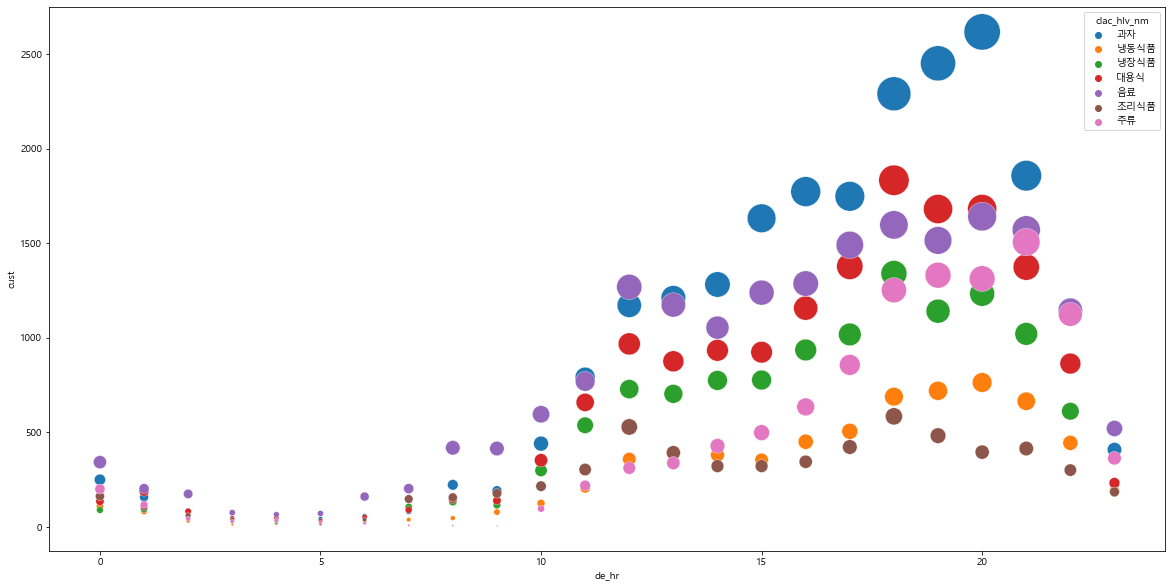

In [21]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x=times_2_df['de_hr'],y=times_2_df['cust'],hue=times_2_df['clac_hlv_nm'],s=times_2_df['cust']/2)